# Figure 2: Liquid freshwater content (LFWC) anomaly time series

In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import shapely
import geopandas as gpd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:107: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


### Load datasets

#### Curry and Mauritzen (2005)

In [2]:
lfwc_spna_cm = pd.read_csv('Curry_and_Mauritzen_2005_fig02_fw_spna.csv',
                           header=None,names = ["time", "dF"])
lfwc_spna_cm.time = pd.DatetimeIndex(pd.date_range('1955-06-30','1995-06-30',freq='60M'))
lfwc_spna_cm.set_index(['time'],inplace=True)

In [3]:
lfwc_nsea_cm = pd.read_csv('Curry_and_Mauritzen_2005_fig02_fw_nsea.csv',
                           header=None,names = ["time", "dF"])
lfwc_nsea_cm.time = pd.DatetimeIndex(pd.date_range('1955-06-30','2000-06-30',freq='60M'))
lfwc_nsea_cm.set_index(['time'],inplace=True)

#### ECCOv4 and HadOBS EN4

In [5]:
lfwc_spna_en_pentad = xr.open_dataset('/mnt/efs/data/hadobs/en4_lfwc_spna_pentad.nc')
lfwc_spna_en_monthly = xr.open_dataset('/mnt/efs/data/hadobs/en4_lfwc_spna_monthly.nc').lfwc
lfwc_spna_ec_monthly = xr.open_dataset('/mnt/efs/data/ecco/eccov4r4_lfwc_spna_monthly_anom.nc').lfwc

lfwc_nsea_en_pentad = xr.open_dataset('/mnt/efs/data/hadobs/en4_lfwc_nsea_pentad.nc')
lfwc_nsea_en_monthly = xr.open_dataset('/mnt/efs/data/hadobs/en4_lfwc_nsea_monthly.nc').lfwc
lfwc_nsea_ec_monthly = xr.open_dataset('/mnt/efs/data/ecco/eccov4r4_lfwc_nsea_monthly_anom.nc').lfwc

In [6]:
print('Change between 1965 and 1990 (CM05):  +',np.round(lfwc_spna_cm.dF.iloc[7]-lfwc_spna_cm.dF.iloc[2]), 'km^3')
print('Change between 1965 and 1990 (EN4):  +',
      np.round(lfwc_spna_en_pentad.lfwc[7].values-lfwc_spna_en_pentad.lfwc[2].values), 'km^3')

Change between 1965 and 1990 (CM05):  + 15669.0 km^3
Change between 1965 and 1990 (EN4):  + 12815.0 km^3


### Time series plot

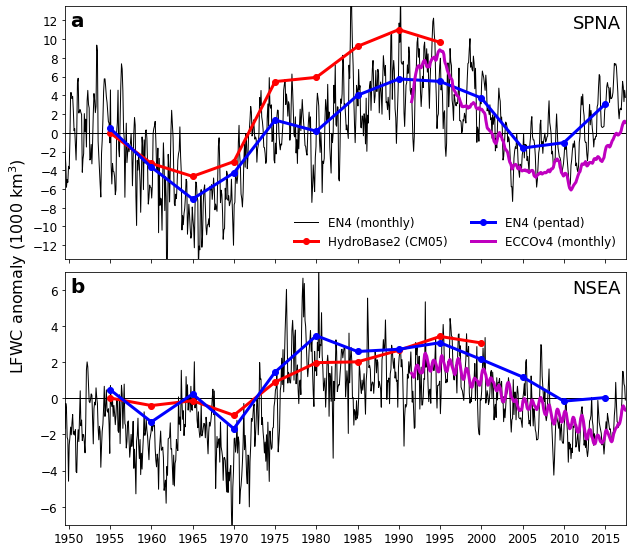

In [12]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 9))

axs[0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0].text(0.01,0.92, 'a', fontsize=20, fontweight='bold', transform=axs[0].transAxes)
axs[0].text(0.99,0.97, 'SPNA', fontsize=18, ha='right', va='top', transform=axs[0].transAxes)

axs[0].plot(lfwc_spna_en_monthly.time,lfwc_spna_en_monthly*1e-3,lw=1,color='k',linestyle='-',label='EN4 (monthly)')
axs[0].plot(lfwc_spna_cm.index,lfwc_spna_cm.dF*1e-3,lw=3,color='r',linestyle='-',marker='o',label='HydroBase2 (CM05)')
axs[0].plot(lfwc_spna_en_pentad.time,lfwc_spna_en_pentad.lfwc*1e-3,lw=3,color='b',linestyle='-',marker='o',
            label='EN4 (pentad)')
axs[0].plot(lfwc_spna_ec_monthly.time,lfwc_spna_ec_monthly*1e-3,lw=3,color='m',linestyle='-',label='ECCOv4 (monthly)')
#axs[0].plot(lfwc_spna_ec_pentad.time,lfwc_spna_ec_pentad.lfwc*1e-3,lw=4,color='c',linestyle='-',marker='d')

axs[0].set_xlim([datetime.date(1950, 1, 1), datetime.date(2018, 1, 31)])
axs[0].set_ylim([-13.5,13.5])
axs[0].set_xticks(pd.date_range('1950-06-30','2015-06-30',freq='60M'))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[0].set_yticks(np.arange(-12,14,2))
axs[0].tick_params(axis = 'both', which = 'major', labelsize = 12)
for tl in axs[0].get_yticklabels():
    tl.set_color('k')
    
axs[1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1].text(0.01,0.92, 'b', fontsize=20, fontweight='bold', transform=axs[1].transAxes)
axs[1].text(0.99,0.97, 'NSEA', fontsize=18, ha='right', va='top', transform=axs[1].transAxes)
axs[1].plot(lfwc_nsea_en_monthly.time,lfwc_nsea_en_monthly*1e-3,lw=1,color='k',linestyle='-',label='EN4 (monthly)')
axs[1].plot(lfwc_nsea_cm.index,lfwc_nsea_cm.dF*1e-3,lw=3,color='r',linestyle='-',marker='o',label='HydroBase2 (CM05)')
axs[1].plot(lfwc_nsea_en_pentad.time,lfwc_nsea_en_pentad.lfwc*1e-3,lw=3,color='b',linestyle='-',marker='o',
            label='EN4 (pentad)')
axs[1].plot(lfwc_nsea_ec_monthly.time,lfwc_nsea_ec_monthly*1e-3,lw=3,color='m',linestyle='-',label='ECCOv4 (monthly)')
#axs[1].plot(lfwc_nsea_ec_pentad.time,lfwc_nsea_ec_pentad.lfwc*1e-3,lw=4,color='c',linestyle='-',marker='d')

axs[1].set_xlim([datetime.date(1950, 1, 1), datetime.date(2018, 1, 31)])
axs[1].set_ylim([-7,7])
axs[1].set_xticks(pd.date_range('1950-06-30','2015-06-30',freq='60M'))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[1].set_yticks(np.arange(-6,8,2))
axs[1].tick_params(axis = 'both', which = 'major', labelsize = 12)
for tl in axs[1].get_yticklabels():
    tl.set_color('k')

axs[0].legend(loc='upper left',frameon=False, fontsize=14)
axs[0].legend(frameon=False, fontsize=12, loc='lower right', ncol=2)

fig.subplots_adjust(left=0.12, right=0.9, bottom=0.1, top=0.9, hspace=0.05, wspace=0.03)
fig.text(0.04, 0.5, 'LFWC anomaly (1000 km$^3$)', va='center', rotation='vertical',fontsize=16)

#plt.savefig('/mnt/efs/figure.png')
plt.savefig('/mnt/efs/figure.eps')
#plt.savefig('/mnt/efs/figure.pdf')
plt.show()

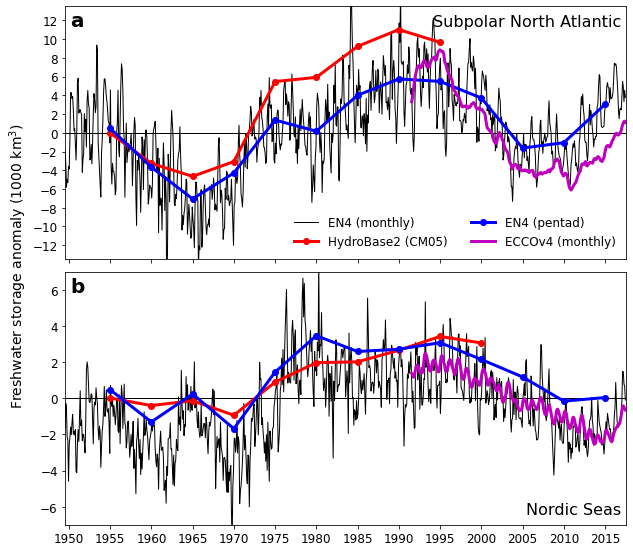

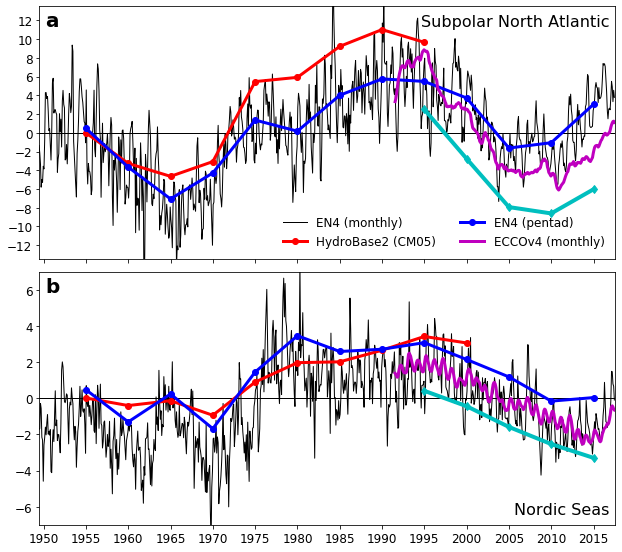

In [8]:
lfwc_spna_as_monthly = xr.open_dataset('/mnt/efs/data/aste/aste_lfwc_spna_monthly_anom.nc').lfwc
lfwc_nsea_as_monthly = xr.open_dataset('/mnt/efs/data/aste/aste_lfwc_nsea_monthly_anom.nc').lfwc

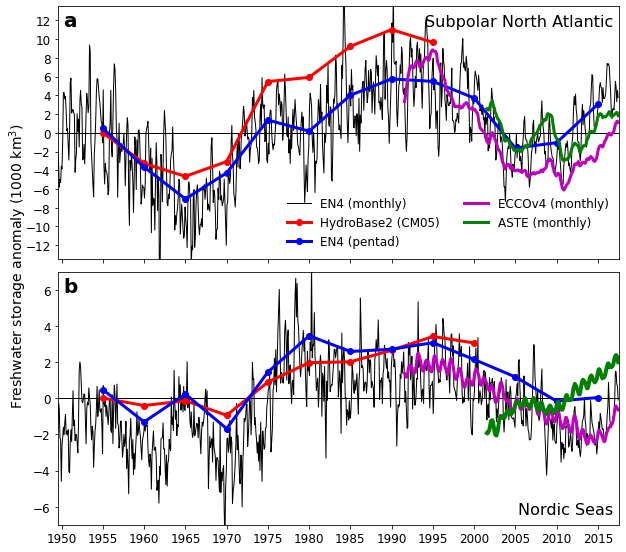

In [9]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 9))

axs[0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0].text(0.01,0.92, 'a', fontsize=20, fontweight='bold', transform=axs[0].transAxes)
axs[0].text(0.99,0.97, 'Subpolar North Atlantic', fontsize=16, ha='right', va='top', transform=axs[0].transAxes)

axs[0].plot(lfwc_spna_en_monthly.time,lfwc_spna_en_monthly*1e-3,lw=1,color='k',linestyle='-',label='EN4 (monthly)')
axs[0].plot(lfwc_spna_cm.index,lfwc_spna_cm.dF*1e-3,lw=3,color='r',linestyle='-',marker='o',label='HydroBase2 (CM05)')
axs[0].plot(lfwc_spna_en_pentad.time,lfwc_spna_en_pentad.lfwc*1e-3,lw=3,color='b',linestyle='-',marker='o',
            label='EN4 (pentad)')
axs[0].plot(lfwc_spna_ec_monthly.time,lfwc_spna_ec_monthly*1e-3,lw=3,color='m',linestyle='-',label='ECCOv4 (monthly)')
axs[0].plot(lfwc_spna_as_monthly.time,lfwc_spna_as_monthly*1e-3,lw=3,color='g',linestyle='-',label='ASTE (monthly)')

axs[0].set_xlim([datetime.date(1950, 1, 1), datetime.date(2018, 1, 31)])
axs[0].set_ylim([-13.5,13.5])
axs[0].set_xticks(pd.date_range('1950-06-30','2015-06-30',freq='60M'))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[0].set_yticks(np.arange(-12,14,2))
axs[0].tick_params(axis = 'both', which = 'major', labelsize = 12)
for tl in axs[0].get_yticklabels():
    tl.set_color('k')
    
axs[1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1].text(0.01,0.92, 'b', fontsize=20, fontweight='bold', transform=axs[1].transAxes)
axs[1].text(0.99,0.03, 'Nordic Seas', fontsize=16, ha='right', va='bottom', transform=axs[1].transAxes)
axs[1].plot(lfwc_nsea_en_monthly.time,lfwc_nsea_en_monthly*1e-3,lw=1,color='k',linestyle='-',label='EN4 (monthly)')
axs[1].plot(lfwc_nsea_cm.index,lfwc_nsea_cm.dF*1e-3,lw=3,color='r',linestyle='-',marker='o',label='HydroBase2 (CM05)')
axs[1].plot(lfwc_nsea_en_pentad.time,lfwc_nsea_en_pentad.lfwc*1e-3,lw=3,color='b',linestyle='-',marker='o',
            label='EN4 (pentad)')
axs[1].plot(lfwc_nsea_ec_monthly.time,lfwc_nsea_ec_monthly*1e-3,lw=3,color='m',linestyle='-',label='ECCOv4 (monthly)')
axs[1].plot(lfwc_nsea_as_monthly.time,lfwc_nsea_as_monthly*1e-3,lw=4,color='g',linestyle='-',label='ASTE (monthly)')
axs[1].set_xlim([datetime.date(1950, 1, 1), datetime.date(2018, 1, 31)])
axs[1].set_ylim([-7,7])
axs[1].set_xticks(pd.date_range('1950-06-30','2015-06-30',freq='60M'))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[1].set_yticks(np.arange(-6,8,2))
axs[1].tick_params(axis = 'both', which = 'major', labelsize = 12)
for tl in axs[1].get_yticklabels():
    tl.set_color('k')

axs[0].legend(loc='upper left',frameon=False, fontsize=14)
axs[0].legend(frameon=False, fontsize=12, loc='lower right', ncol=2)

fig.subplots_adjust(left=0.12, right=0.9, bottom=0.1, top=0.9, hspace=0.05, wspace=0.03)
fig.text(0.05, 0.5, 'Freshwater storage anomaly (1000 km$^3$)', va='center', rotation='vertical',fontsize=14)

plt.savefig('/mnt/efs/figure.png')
#plt.savefig('/mnt/efs/figure.eps')
#plt.savefig('/mnt/efs/figure.pdf')
plt.show()

In [11]:
lfwc_spna_ec_monthly = xr.open_dataset('/mnt/efs/data/ecco/eccov4r4_lfwc_spna_monthly.nc').lfwc
lfwc_nsea_ec_monthly = xr.open_dataset('/mnt/efs/data/ecco/eccov4r4_lfwc_nsea_monthly.nc').lfwc

In [12]:
lfwc_spna_as_monthly = xr.open_dataset('/mnt/efs/data/aste/aste_lfwc_spna_monthly.nc').lfwc
lfwc_nsea_as_monthly = xr.open_dataset('/mnt/efs/data/aste/aste_lfwc_nsea_monthly.nc').lfwc

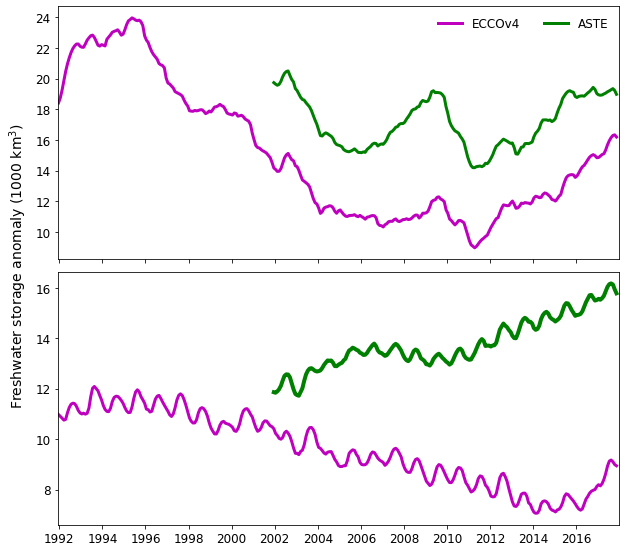

In [14]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 9))


axs[0].plot(lfwc_spna_ec_monthly.time,lfwc_spna_ec_monthly*1e-3,lw=3,color='m',linestyle='-',label='ECCOv4')
axs[0].plot(lfwc_spna_as_monthly.time,lfwc_spna_as_monthly*1e-3,lw=3,color='g',linestyle='-',label='ASTE')

axs[0].set_xlim([datetime.date(1992, 1, 1), datetime.date(2018, 1, 31)])
#axs[0].set_ylim([-13.5,13.5])
axs[0].set_xticks(pd.date_range('1992-01-01','2018-01-01',freq='24M'))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#axs[0].set_yticks(np.arange(-12,14,2))
axs[0].tick_params(axis = 'both', which = 'major', labelsize = 12)\

axs[1].plot(lfwc_nsea_ec_monthly.time,lfwc_nsea_ec_monthly*1e-3,lw=3,color='m',linestyle='-',label='ECCOv4')
axs[1].plot(lfwc_nsea_as_monthly.time,lfwc_nsea_as_monthly*1e-3,lw=4,color='g',linestyle='-',label='ASTE')

axs[1].set_xlim([datetime.date(1992, 1, 1), datetime.date(2018, 1, 31)])
#axs[1].set_ylim([-7,7])
axs[1].set_xticks(pd.date_range('1992-01-01','2018-01-01',freq='24M'))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#axs[1].set_yticks(np.arange(-6,8,2))
axs[1].tick_params(axis = 'both', which = 'major', labelsize = 12)

axs[0].legend(frameon=False, fontsize=12, loc='upper right', ncol=2)

fig.subplots_adjust(left=0.12, right=0.9, bottom=0.1, top=0.9, hspace=0.05, wspace=0.03)
fig.text(0.05, 0.5, 'Freshwater storage anomaly (1000 km$^3$)', va='center', rotation='vertical',fontsize=14)

plt.show()